## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Importing Libraries and Packages


In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

#STATSMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

#SCI-KIT LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

# Introduction to Housing Data Analysis

    This analysis will look at different variables that could potential predict whether house prices will increase in King County, Washington.  The variables are taken from the King County Housing Data Set.  Before delving into the variables, I will be cleaning up the data to prepare it for engineering.  Based on the result, I am hoping to at least use 4-5 variables to predict prices.  

In [2]:
data = pd.read_csv("kc_house_data.csv")
pd.set_option('display.max_columns' ,0) #displaying all columns 
data.head() #check first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.tail() #check last 5 rows


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
column_names = data.columns #list of all column names 
print(column_names)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


# Column Names and descriptions for Kings County Data Set¶

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
data.info() #housing data information and also to see if there are any missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Observation:

* There are a total of 21,597 rows and 21 columns
* 3 Columns (waterfront, view, yr_renovated,) seems to have some data missing.
* waterfront, view, and condition seem to be categorical
* date, sqft_basement are classified as objects
* sqft_basement not all houses have basements and is also marked as an object


# Getting Rid of Columns that does not really contribute informatin

* Dropping **id** and **date**

In [6]:
data.drop(['id','date'], axis = 1, inplace =True)# in place TRUE to make sure that the dropped is successful within the dataframe

In [7]:
data.head()#columns dropped


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
data.isna().sum() #looking at how much missing data 
nulls = data.isnull().sum() #nice trick from James to whittle down which columns have missing data 
print(nulls[nulls > 0])

waterfront      2376
view              63
yr_renovated    3842
dtype: int64


In [9]:
data.dropna(subset = ['view'], inplace = True)#dropping rows in view since it's missing less than 1% of values

In [10]:
data.isnull().sum() / len(data.index) #checking again and now view has 0% missing data
                                      #what to do with the rest?

price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110059
view             0.000000
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177858
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [11]:
data['waterfront'].describe()

count    19164.000000
mean         0.007566
std          0.086657
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [12]:
data['waterfront'].fillna(data['waterfront'].median(), inplace=True)

In [13]:
data.isnull().sum() / len(data.index)

price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
view             0.000000
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177858
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [14]:
data['yr_renovated'].describe()

count    17704.000000
mean        83.765025
std        400.239690
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [15]:
data.groupby('yr_renovated')['price'].describe().round(3)#i see that for yr_renovated with NaN, std = mean

,count,mean,std,min,25%,50%,75%,max
yr_renovated,,,,,,,,
0.0,16961.0,530401.031,348593.885,80000.0,320000.0,447500.0,633000.0,6890000.0
1934.0,1.0,459950.000,NaN,459950.0,459950.0,459950.0,459950.0,459950.0
1940.0,2.0,378400.000,92065.303,313300.0,345850.0,378400.0,410950.0,443500.0
1944.0,1.0,521000.000,NaN,521000.0,521000.0,521000.0,521000.0,521000.0
1945.0,3.0,398666.667,155853.564,256000.0,315500.0,375000.0,470000.0,565000.0
...,...,...,...,...,...,...,...,...
2011.0,9.0,531416.667,194776.956,329000.0,378750.0,507000.0,650000.0,831000.0
2012.0,8.0,633375.000,256891.132,294000.0,475000.0,568750.0,888750.0,970500.0
2013.0,31.0,674275.806,445043.415,224000.0,402250.0,570000.0,854400.0,2500000.0


In [16]:
data['yr_renovated'].replace(0.0,np.nan,inplace=True)# Using Binary Code and creating new column that makes it easier whether a house has been renovated (1) or not (0)


In [17]:
nan = data['yr_renovated'].loc[data['yr_renovated'].isna()].index #getting index to create a new column 
notnan = data['yr_renovated'].loc[~data['yr_renovated'].isna()].index

In [18]:
data['new_yr_renovated'] = data['yr_renovated'].copy 
data['new_yr_renovated'][nan] = 0
data['new_yr_renovated'][notnan] = 1

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
price               21534 non-null float64
bedrooms            21534 non-null int64
bathrooms           21534 non-null float64
sqft_living         21534 non-null int64
sqft_lot            21534 non-null int64
floors              21534 non-null float64
waterfront          21534 non-null float64
view                21534 non-null float64
condition           21534 non-null int64
grade               21534 non-null int64
sqft_above          21534 non-null int64
sqft_basement       21534 non-null object
yr_built            21534 non-null int64
yr_renovated        743 non-null float64
zipcode             21534 non-null int64
lat                 21534 non-null float64
long                21534 non-null float64
sqft_living15       21534 non-null int64
sqft_lot15          21534 non-null int64
new_yr_renovated    21534 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 4

/Users/john.ofrecio/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/john.ofrecio/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
data.drop(['yr_renovated'], axis = 1, inplace =True) #dropping yr_renovated

In [20]:
data.isnull().sum() / len(data.index) #no more missing data


price               0.0
bedrooms            0.0
bathrooms           0.0
sqft_living         0.0
sqft_lot            0.0
floors              0.0
waterfront          0.0
view                0.0
condition           0.0
grade               0.0
sqft_above          0.0
sqft_basement       0.0
yr_built            0.0
zipcode             0.0
lat                 0.0
long                0.0
sqft_living15       0.0
sqft_lot15          0.0
new_yr_renovated    0.0
dtype: float64

# Categorical Values

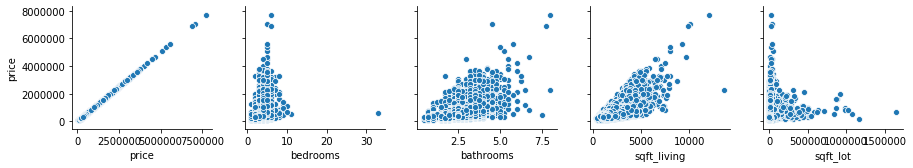

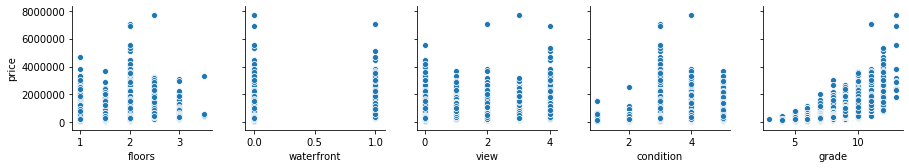

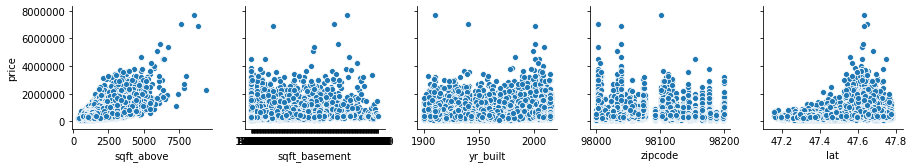

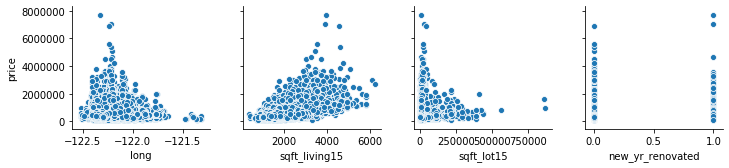

In [21]:
for i in range(0, len(data.columns), 5): #visualizing comparing characteristics to price 
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['price'])

In [22]:
data.describe().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,new_yr_renovated
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,540057.664,3.373,2.116,2079.828,15090.596,1.494,0.007,0.234,3.410,7.657,1788.558,1971.002,98077.939,47.560,-122.214,1986.300,12751.080,0.035
std,366059.581,0.926,0.769,917.447,41380.210,0.540,0.082,0.766,0.651,1.173,827.746,29.376,53.507,0.139,0.141,685.121,27255.483,0.183
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,98001.000,47.156,-122.519,399.000,651.000,0.000
25%,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,98033.000,47.471,-122.328,1490.000,5100.000,0.000
50%,450000.000,3.000,2.250,1910.000,7617.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,98065.000,47.572,-122.230,1840.000,7620.000,0.000
75%,645000.000,4.000,2.500,2550.000,10687.750,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,98118.000,47.678,-122.125,2360.000,10083.000,0.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,1.000


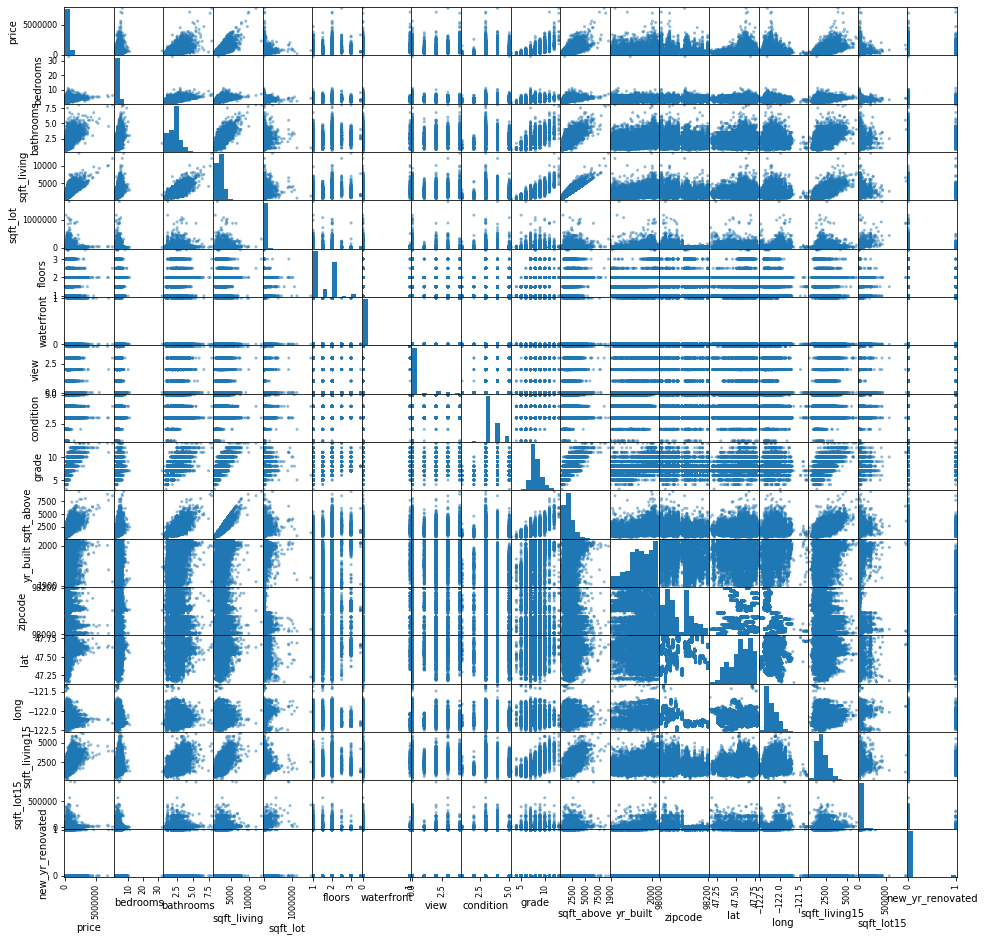

In [23]:
fig = pd.plotting.scatter_matrix(data, figsize=(16,16));


# Observation

* **Categorical Values**:view, waterfront, zipcode
* **Ordinal Data**: bedrooms, bathrooms, floors, view, grade

#Transforming Categorical Values

In [24]:
data.info() #sqft_basement is an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
price               21534 non-null float64
bedrooms            21534 non-null int64
bathrooms           21534 non-null float64
sqft_living         21534 non-null int64
sqft_lot            21534 non-null int64
floors              21534 non-null float64
waterfront          21534 non-null float64
view                21534 non-null float64
condition           21534 non-null int64
grade               21534 non-null int64
sqft_above          21534 non-null int64
sqft_basement       21534 non-null object
yr_built            21534 non-null int64
zipcode             21534 non-null int64
lat                 21534 non-null float64
long                21534 non-null float64
sqft_living15       21534 non-null int64
sqft_lot15          21534 non-null int64
new_yr_renovated    21534 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.9+ MB


In [25]:
basement = data['sqft_basement']
basement_series = pd.Series(basement)
basement_series

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21534, dtype: object

In [26]:
basement_series.describe()

count     21534
unique      302
top         0.0
freq      12798
Name: sqft_basement, dtype: object

In [27]:
cat_basement = basement_series.astype('category')
cat_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21534, dtype: category
Categories (302, object): [0.0, 10.0, 100.0, 1000.0, ..., 970.0, 980.0, 990.0, ?]

In [28]:
coded_basement = cat_basement.cat.codes
coded_basement

0          0
1        207
2          0
3        289
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Length: 21534, dtype: int16

In [29]:
data['coded_basement'] = coded_basement
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,new_yr_renovated,coded_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,1,207
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0,289
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0,0


In [30]:
data.drop(['sqft_basement'], axis = 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,new_yr_renovated,coded_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,207
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,0,289
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


# Multicollinearity

In [31]:
data.corr().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,new_yr_renovated,coded_basement
price,1.000,0.308,0.525,0.702,0.090,0.257,0.259,0.396,0.035,0.668,0.606,0.054,-0.054,0.308,0.022,0.585,0.083,0.118,0.076
bedrooms,0.308,1.000,0.514,0.578,0.033,0.177,-0.004,0.079,0.026,0.356,0.479,0.155,-0.154,-0.010,0.132,0.393,0.031,0.018,0.077
bathrooms,0.525,0.514,1.000,0.755,0.089,0.502,0.061,0.186,-0.127,0.665,0.686,0.508,-0.204,0.024,0.225,0.569,0.089,0.047,0.093
sqft_living,0.702,0.578,0.755,1.000,0.174,0.354,0.102,0.283,-0.060,0.762,0.877,0.318,-0.200,0.052,0.242,0.756,0.185,0.051,0.074
sqft_lot,0.090,0.033,0.089,0.174,1.000,-0.005,0.021,0.075,-0.008,0.115,0.184,0.053,-0.130,-0.085,0.230,0.145,0.717,0.005,-0.046
floors,0.257,0.177,0.502,0.354,-0.005,1.000,0.020,0.028,-0.264,0.459,0.523,0.489,-0.059,0.049,0.125,0.279,-0.011,0.003,-0.203
waterfront,0.259,-0.004,0.061,0.102,0.021,0.020,1.000,0.382,0.016,0.081,0.070,-0.025,0.029,-0.012,-0.038,0.082,0.031,0.075,0.009
view,0.396,0.079,0.186,0.283,0.075,0.028,0.382,1.000,0.046,0.250,0.166,-0.055,0.085,0.006,-0.078,0.280,0.073,0.090,0.087
condition,0.035,0.026,-0.127,-0.060,-0.008,-0.264,0.016,0.046,1.000,-0.147,-0.159,-0.361,0.002,-0.016,-0.105,-0.093,-0.003,-0.055,0.101
grade,0.668,0.356,0.665,0.762,0.115,0.459,0.081,0.250,-0.147,1.000,0.756,0.448,-0.186,0.114,0.201,0.713,0.121,0.015,-0.008


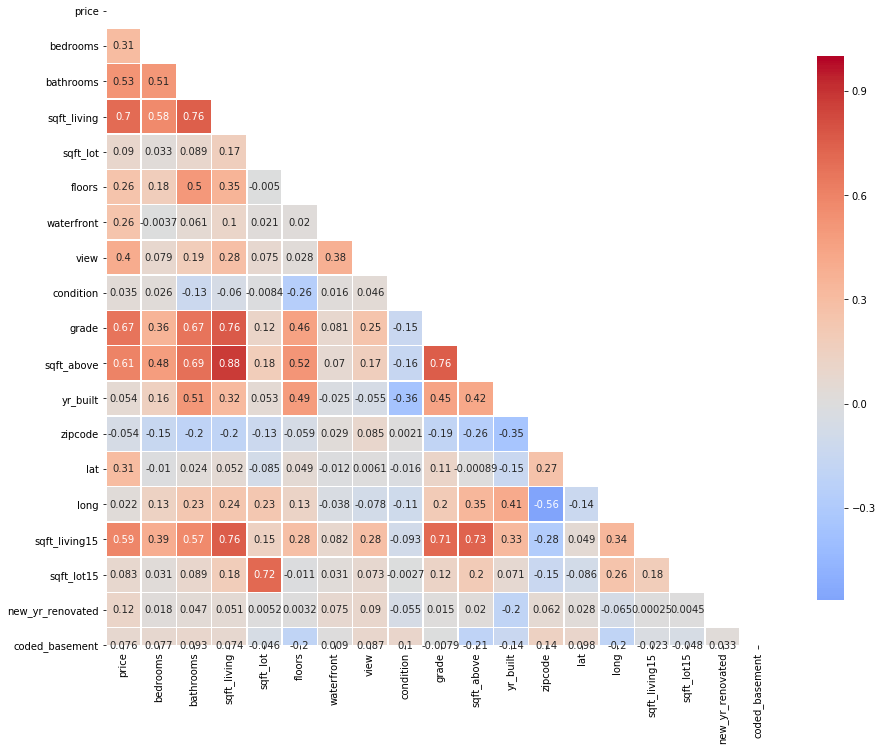

In [32]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

# Observation:
* **sqft_living** and **sqft_above** show high correality

In [33]:
try:
    drop_cols = ['sqft_living', 'sqft_above']
    data.drop(drop_cols, axis=1, inplace=True)
except: 
    print('drop_cols were not in the dataframe')

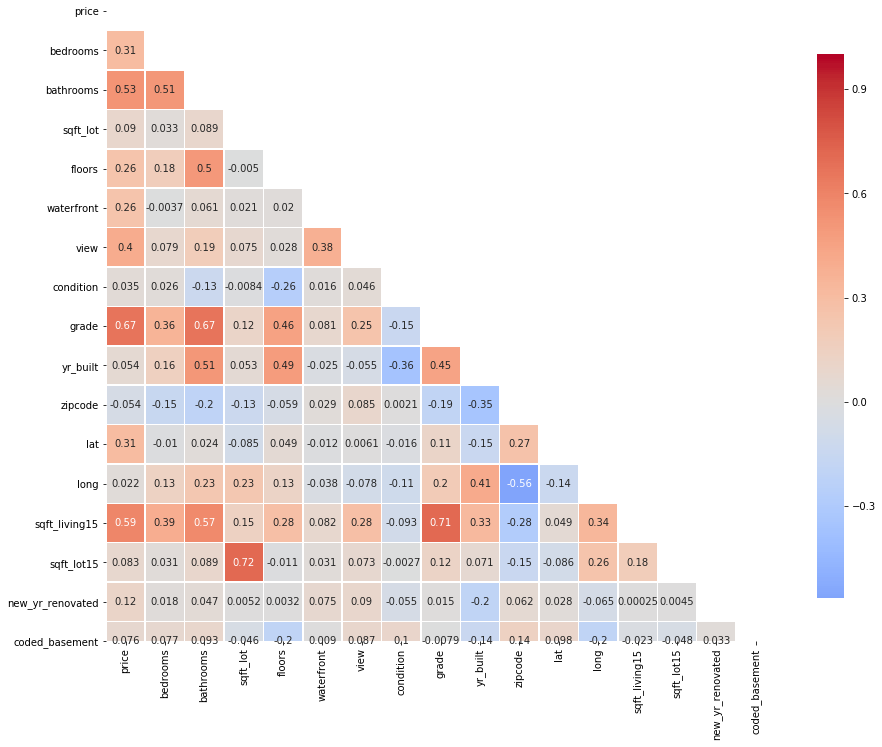

In [34]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

# Normalization: Log Transformation

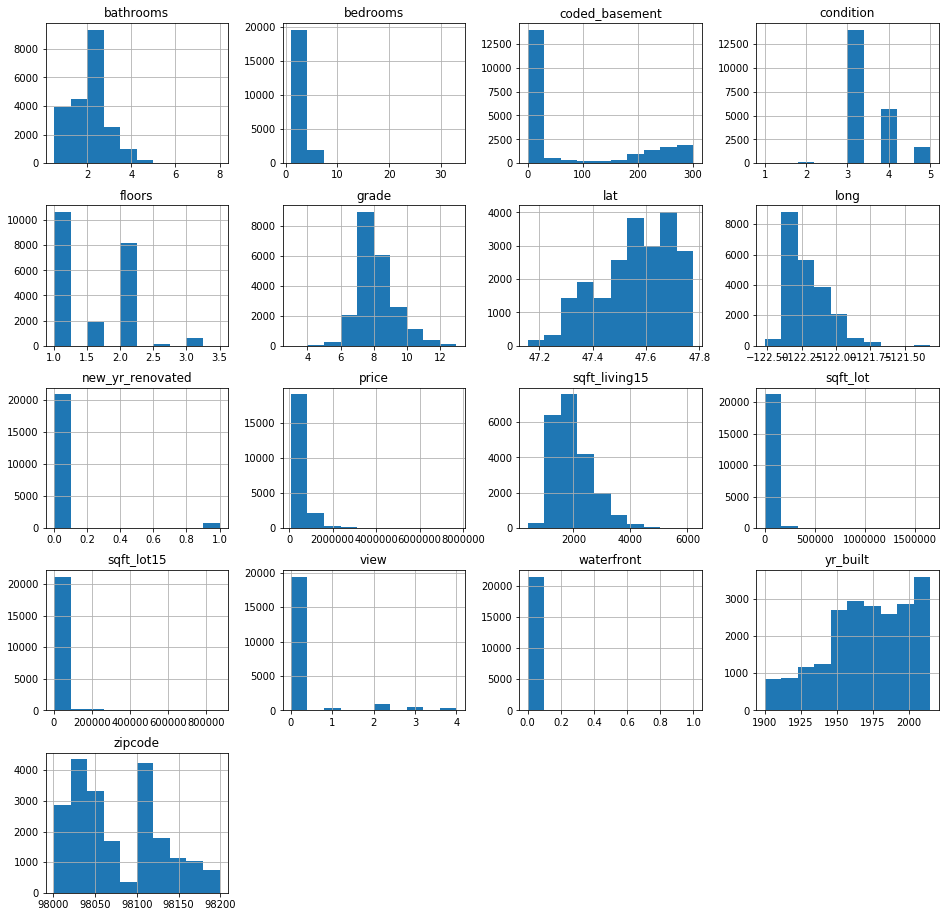

In [35]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,16)
data.hist();

In [36]:
log_cols= ['bathrooms','sqft_living15','yr_built','zipcode']

for col in log_cols:
    data[col+'_log'] = np.log(data[col])

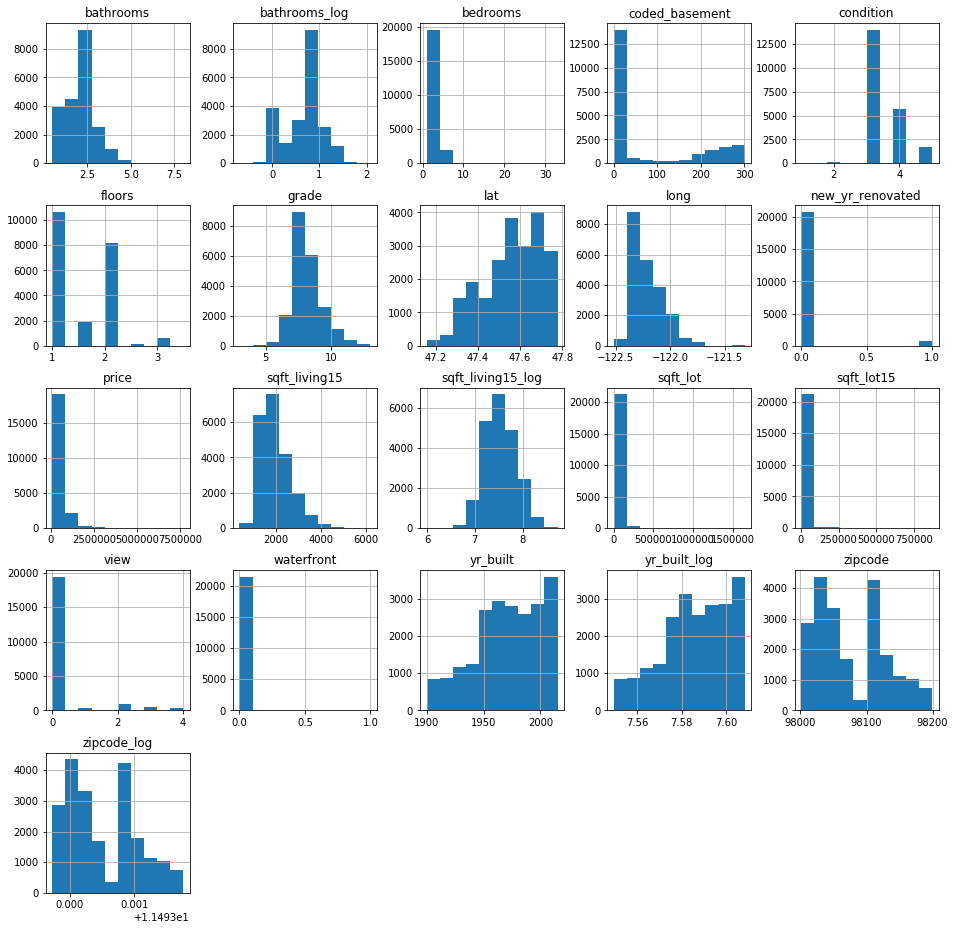

In [37]:
data.hist();

# Observation:
It looks like **bathrooms_log** and **sqft_living15_log** normalized using log.  The other log columns did not change. 

In [38]:
data.drop('bathrooms', axis=1, inplace=True)

In [39]:
data.drop(['sqft_living15','yr_built_log','zipcode_log'], axis=1, inplace=True)


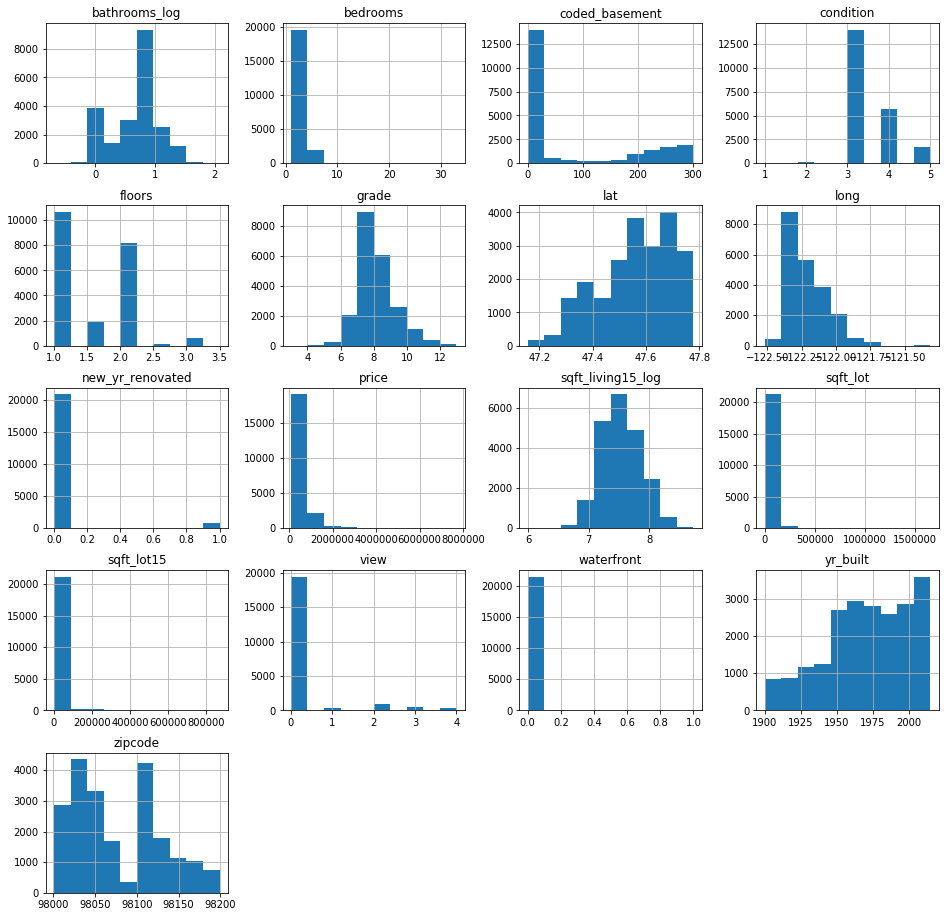

In [40]:
data.hist();

# Standardization
Cataegorical Values: **values**,**waterfront**,**zipcode**

Ordinal Data: **bedrooms**,**bathrooms**,**floors**,**view**,**grade**

In [41]:
data.describe().round(3)

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_lot15,new_yr_renovated,coded_basement,bathrooms_log,sqft_living15_log
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,540057.664,3.373,15090.596,1.494,0.007,0.234,3.410,7.657,1971.002,98077.939,47.560,-122.214,12751.080,0.035,77.159,0.678,7.539
std,366059.581,0.926,41380.210,0.540,0.082,0.766,0.651,1.173,29.376,53.507,0.139,0.141,27255.483,0.183,112.067,0.392,0.327
min,78000.000,1.000,520.000,1.000,0.000,0.000,1.000,3.000,1900.000,98001.000,47.156,-122.519,651.000,0.000,0.000,-0.693,5.989
25%,322000.000,3.000,5040.000,1.000,0.000,0.000,3.000,7.000,1951.000,98033.000,47.471,-122.328,5100.000,0.000,0.000,0.560,7.307
50%,450000.000,3.000,7617.000,1.500,0.000,0.000,3.000,7.000,1975.000,98065.000,47.572,-122.230,7620.000,0.000,0.000,0.811,7.518
75%,645000.000,4.000,10687.750,2.000,0.000,0.000,4.000,8.000,1997.000,98118.000,47.678,-122.125,10083.000,0.000,201.000,0.916,7.766
max,7700000.000,33.000,1651359.000,3.500,1.000,4.000,5.000,13.000,2015.000,98199.000,47.778,-121.315,871200.000,1.000,301.000,2.079,8.734


In [42]:
cat_cols = ['waterfront','coded_basement','zipcode','price']
num_cols = data.drop(cat_cols, axis=1).columns

In [43]:
num_cols

Index(['bedrooms', 'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'yr_built', 'lat', 'long', 'sqft_lot15', 'new_yr_renovated',
       'bathrooms_log', 'sqft_living15_log'],
      dtype='object')

In [44]:
x_cols = ['bedroom','sqft_lot','floors','view', 'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15', 'new_yr_renovated', 'bathrooms_log','sqft_living15_log']

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
scaled_data = scaler.fit_transform(data[num_cols])

In [47]:
try:
    scaled_data = scaler.fit_transform(data[num_cols])
except:
    print('I dont know what to do')

In [48]:
df_scaled = pd.DataFrame(scaled_data, columns = num_cols)
df_scaled.describe().round(3)

,bedrooms,sqft_lot,floors,view,condition,grade,yr_built,lat,long,sqft_lot15,new_yr_renovated,bathrooms_log,sqft_living15_log
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.562,-0.352,-0.915,-0.305,-3.704,-3.972,-2.417,-2.918,-2.168,-0.444,-0.189,-3.493,-4.735
25%,-0.403,-0.243,-0.915,-0.305,-0.630,-0.561,-0.681,-0.642,-0.810,-0.281,-0.189,-0.301,-0.711
50%,-0.403,-0.181,0.011,-0.305,-0.630,-0.561,0.136,0.085,-0.114,-0.188,-0.189,0.340,-0.067
75%,0.677,-0.106,0.937,-0.305,0.907,0.292,0.885,0.851,0.632,-0.098,-0.189,0.608,0.693
max,31.981,39.543,3.716,4.919,2.444,4.556,1.498,1.570,6.388,31.497,5.290,3.572,3.648


In [49]:
for i in cat_cols:
    df_scaled[i] = data[i].copy()
    
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 17 columns):
bedrooms             21534 non-null float64
sqft_lot             21534 non-null float64
floors               21534 non-null float64
view                 21534 non-null float64
condition            21534 non-null float64
grade                21534 non-null float64
yr_built             21534 non-null float64
lat                  21534 non-null float64
long                 21534 non-null float64
sqft_lot15           21534 non-null float64
new_yr_renovated     21534 non-null float64
bathrooms_log        21534 non-null float64
sqft_living15_log    21534 non-null float64
waterfront           21472 non-null float64
coded_basement       21472 non-null float64
zipcode              21472 non-null float64
price                21472 non-null float64
dtypes: float64(17)
memory usage: 2.8 MB


In [50]:
df_scaled.head()

,bedrooms,sqft_lot,floors,view,condition,grade,yr_built,lat,long,sqft_lot15,new_yr_renovated,bathrooms_log,sqft_living15_log,waterfront,coded_basement,zipcode,price
0,-0.402680,-0.228148,-0.915398,-0.305436,-0.629726,-0.560649,-0.544752,-0.353580,-0.305912,-0.260544,-0.189041,-1.726517,-1.035003,0.0,0.0,98178.0,221900.0
1,-0.402680,-0.189675,0.937163,-0.305436,-0.629726,-0.560649,-0.680920,1.160948,-0.746467,-0.187566,5.289849,0.339761,-0.326314,0.0,207.0,98125.0,538000.0
2,-1.482141,-0.123023,-0.915398,-0.305436,-0.629726,-1.413443,-1.293679,1.282948,-0.135375,-0.172046,-0.189041,-1.726517,1.127055,0.0,0.0,98028.0,180000.0
3,0.676781,-0.243856,-0.915398,-0.305436,2.444177,-0.560649,-0.204330,-0.284279,-1.272291,-0.284393,-0.189041,1.072785,-0.989759,0.0,289.0,98136.0,604000.0
4,-0.402680,-0.169423,-0.915398,-0.305436,-0.629726,0.292146,0.544597,0.408737,1.200501,-0.192556,-0.189041,0.039646,-0.133740,0.0,0.0,98074.0,510000.0


In [51]:
type(df_scaled)

pandas.core.frame.DataFrame

# Models 

Predictors:

In [87]:
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = ['grade','bathrooms_log','C(zipcode)', 'sqft_living15_log']
predictors = '+' .join(x_cols)
formula = outcome + "~" + predictors

print(formula)

price~grade+bathrooms_log+C(zipcode)+sqft_living15_log


In [88]:
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     610.8
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:20:48   Log-Likelihood:            -2.9441e+05
No. Observations:               21534   AIC:                         5.890e+05
Df Residuals:                   21461   BIC:                         5.896e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.303e+06   4.66e+04    -49.454      0.000   -2.39e+06   -2.21e+06
C(zipcode)[T.98002]  8.358e+04   1.86e+04      4.495      0.000    4.71e+04     1.2e+05
C(zipcode)[T.98003] -2.503e+04   1.67e+04     -1.494      0.135   -5.79e+04    7799.347
C(zipcode)[T.98004]  8.039e+05   1.64e+04     49.144      0.000    7.72e+05    8.36e+05
C(zipcode)[T.98005]  2.898e+05   1.97e+04     14.686      0.000    2.51e+05    3.28e+05
C(zipcode)[T.98006]  2.847e+05   1.47e+04     19.303      0.000    2.56e+05    3.14e+05
C(zipcode)[T.98007]  2.129e+05   2.09e+04     10.190      0.000    1.72e+05    2.54e+05
C(zipcode)[T.98008]   2.94e+05   1.67e+04     17.602      0.000    2.61e+05    3.27e+05
C(zipcode)[T.98010]  1.147e+05   2.37e+04      4.828      0.000    6.81e+04    1.61e+05
C(zipcode)[T.98011]  9.321e+04   1.87e+04      4.973      0.000    5.65e+04     1.3e+05
C(zipcode)[T.98014]  1.578e+05   2.19e+04      7.213      0.000    1.15e+05    2.01e+05
C(zipcode)[T.98019]  7.611e+04   1.89e+04      4.036      0.000    3.91e+04    1.13e+05
C(zipcode)[T.98022]  5.801e+04   1.77e+04      3.279      0.001    2.33e+04    9.27e+04
C(zipcode)[T.98023] -4.441e+04   1.46e+04     -3.049      0.002    -7.3e+04   -1.59e+04
C(zipcode)[T.98024]  2.412e+05   2.61e+04      9.240      0.000     1.9e+05    2.92e+05
C(zipcode)[T.98027]  1.538e+05   1.53e+04     10.080      0.000    1.24e+05    1.84e+05
C(zipcode)[T.98028]  1.056e+05   1.67e+04      6.310      0.000    7.28e+04    1.38e+05
C(zipcode)[T.98029]  1.317e+05   1.62e+04      8.126      0.000    9.99e+04    1.63e+05
C(zipcode)[T.98030] -1.825e+04   1.72e+04     -1.062      0.288   -5.19e+04    1.54e+04
C(zipcode)[T.98031] -8260.0922   1.69e+04     -0.490      0.624   -4.13e+04    2.48e+04
C(zipcode)[T.98032]   1.98e+04   2.19e+04      0.905      0.366   -2.31e+04    6.27e+04
C(zipcode)[T.98033]  3.745e+05    1.5e+04     24.895      0.000    3.45e+05    4.04e+05
C(zipcode)[T.98034]  2.006e+05   1.43e+04     14.053      0.000    1.73e+05    2.29e+05
C(zipcode)[T.98038]  3107.2269   1.41e+04      0.220      0.826   -2.45e+04    3.08e+04
C(zipcode)[T.98039]  1.446e+06   3.19e+04     45.351      0.000    1.38e+06    1.51e+06
C(zipcode)[T.98040]  5.708e+05    1.7e+04     33.617      0.000    5.37e+05    6.04e+05
C(zipcode)[T.98042]  -875.2488   1.43e+04     -0.061      0.951   -2.89e+04    2.71e+04
C(zipcode)[T.98045]  1.069e+05    1.8e+04      5.941      0.000    7.16e+04    1.42e+05
C(zipcode)[T.98052]  1.859e+05   1.42e+04     13.085      0.000    1.58e+05    2.14e+05
C(zipcode)[T.98053]  1.966e+05   1.53e+04     12.820      0.000    1.67e+05    2.27e+05
C(zipcode)[T.98055]  5.369e+04    1.7e+04      3.167      0.002    2.05e+04    8.69e+04
C(zipcode)[T.98056]   1.28e+05   1.52e+04      8.400      0.000    9.81e+04    1.58e+05
C(z

In [96]:
model.params

Intercept             -2.303199e+06
C(zipcode)[T.98002]    8.358191e+04
C(zipcode)[T.98003]   -2.502586e+04
C(zipcode)[T.98004]    8.039293e+05
C(zipcode)[T.98005]    2.897559e+05
                           ...     
C(zipcode)[T.98198]    6.982350e+04
C(zipcode)[T.98199]    3.991831e+05
grade                  1.277734e+05
bathrooms_log          6.440029e+04
sqft_living15_log      2.153987e+05
Length: 73, dtype: float64

In [89]:
outcome = 'price'
predictors = (['grade','bathrooms_log','C(zipcode)','sqft_living15_log'])
pred_sum = "+".join(predictors)
formula = outcome + "~" +pred_sum

In [90]:
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     610.8
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:21:16   Log-Likelihood:            -2.9441e+05
No. Observations:               21534   AIC:                         5.890e+05
Df Residuals:                   21461   BIC:                         5.896e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.303e+06   4.66e+04    -49.454      0.000   -2.39e+06   -2.21e+06
C(zipcode)[T.98002]  8.358e+04   1.86e+04      4.495      0.000    4.71e+04     1.2e+05
C(zipcode)[T.98003] -2.503e+04   1.67e+04     -1.494      0.135   -5.79e+04    7799.347
C(zipcode)[T.98004]  8.039e+05   1.64e+04     49.144      0.000    7.72e+05    8.36e+05
C(zipcode)[T.98005]  2.898e+05   1.97e+04     14.686      0.000    2.51e+05    3.28e+05
C(zipcode)[T.98006]  2.847e+05   1.47e+04     19.303      0.000    2.56e+05    3.14e+05
C(zipcode)[T.98007]  2.129e+05   2.09e+04     10.190      0.000    1.72e+05    2.54e+05
C(zipcode)[T.98008]   2.94e+05   1.67e+04     17.602      0.000    2.61e+05    3.27e+05
C(zipcode)[T.98010]  1.147e+05   2.37e+04      4.828      0.000    6.81e+04    1.61e+05
C(zipcode)[T.98011]  9.321e+04   1.87e+04      4.973      0.000    5.65e+04     1.3e+05
C(zipcode)[T.98014]  1.578e+05   2.19e+04      7.213      0.000    1.15e+05    2.01e+05
C(zipcode)[T.98019]  7.611e+04   1.89e+04      4.036      0.000    3.91e+04    1.13e+05
C(zipcode)[T.98022]  5.801e+04   1.77e+04      3.279      0.001    2.33e+04    9.27e+04
C(zipcode)[T.98023] -4.441e+04   1.46e+04     -3.049      0.002    -7.3e+04   -1.59e+04
C(zipcode)[T.98024]  2.412e+05   2.61e+04      9.240      0.000     1.9e+05    2.92e+05
C(zipcode)[T.98027]  1.538e+05   1.53e+04     10.080      0.000    1.24e+05    1.84e+05
C(zipcode)[T.98028]  1.056e+05   1.67e+04      6.310      0.000    7.28e+04    1.38e+05
C(zipcode)[T.98029]  1.317e+05   1.62e+04      8.126      0.000    9.99e+04    1.63e+05
C(zipcode)[T.98030] -1.825e+04   1.72e+04     -1.062      0.288   -5.19e+04    1.54e+04
C(zipcode)[T.98031] -8260.0922   1.69e+04     -0.490      0.624   -4.13e+04    2.48e+04
C(zipcode)[T.98032]   1.98e+04   2.19e+04      0.905      0.366   -2.31e+04    6.27e+04
C(zipcode)[T.98033]  3.745e+05    1.5e+04     24.895      0.000    3.45e+05    4.04e+05
C(zipcode)[T.98034]  2.006e+05   1.43e+04     14.053      0.000    1.73e+05    2.29e+05
C(zipcode)[T.98038]  3107.2269   1.41e+04      0.220      0.826   -2.45e+04    3.08e+04
C(zipcode)[T.98039]  1.446e+06   3.19e+04     45.351      0.000    1.38e+06    1.51e+06
C(zipcode)[T.98040]  5.708e+05    1.7e+04     33.617      0.000    5.37e+05    6.04e+05
C(zipcode)[T.98042]  -875.2488   1.43e+04     -0.061      0.951   -2.89e+04    2.71e+04
C(zipcode)[T.98045]  1.069e+05    1.8e+04      5.941      0.000    7.16e+04    1.42e+05
C(zipcode)[T.98052]  1.859e+05   1.42e+04     13.085      0.000    1.58e+05    2.14e+05
C(zipcode)[T.98053]  1.966e+05   1.53e+04     12.820      0.000    1.67e+05    2.27e+05
C(zipcode)[T.98055]  5.369e+04    1.7e+04      3.167      0.002    2.05e+04    8.69e+04
C(zipcode)[T.98056]   1.28e+05   1.52e+04      8.400      0.000    9.81e+04    1.58e+05
C(z

# Model Validation

In [91]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1).values
y = data['price'].values

X_train, X_Test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [92]:
var_name = ['X_train', 'X_Test','y_train', 'y_test']
var_list = [X_train, X_Test, y_train, y_test]
var_dict = dict(zip(var_name, var_list))

for name,var in var_dict.items():
    print(f"\nVariable: {name}")
    print(f"Data type: {type(var)}")
    print(f"Data Shape: {var.shape}")


Variable: X_train
Data type: <class 'numpy.ndarray'>
Data Shape: (17227, 16)

Variable: X_Test
Data type: <class 'numpy.ndarray'>
Data Shape: (4307, 16)

Variable: y_train
Data type: <class 'numpy.ndarray'>
Data Shape: (17227,)

Variable: y_test
Data type: <class 'numpy.ndarray'>
Data Shape: (4307,)


In [93]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_Test)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_hat_train)
train_r2 = r2_score(y_train, y_hat_train)

test_mse = mean_squared_error(y_test, y_hat_test)
test_r2 = r2_score(y_test, y_hat_test)

print ('Train Mean Squarred Error:', train_mse)
print ('Test Mean Squarred Error:', test_mse)
       
print('\nTrain R-Squared:', train_r2)
print('Test R-squared:', test_r2)

Train Mean Squarred Error: 45592344919.44825
Test Mean Squarred Error: 57595068843.529396

Train R-Squared: 0.6505923348460813
Test R-squared: 0.6108097350133723


# K-Fold Validation

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring= 'neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring= 'neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring= 'neg_mean_squared_error'))

print('VC RESULTS')
print(f"Folds=5, score={cv_5_results}")
print(f"Folds=10, score={cv_10_results}")
print(f"Folds=20, score={cv_20_results}")

VC RESULTS
Folds=5, score=-48415599462.33065
Folds=10, score=-48349144122.15654
Folds=20, score=-48193086937.68544


# Conclusion:

# How did you pick the question(s) that you did?

The main goal for a business is to make money.  In this specific example, if a real estate company can leverage and successfully predict the prices of houses in the future (or at least come close), then they hold a competetive advantage of others and can quickly build up their business.  The main factor behind each of the methods I used for cleaning the data was making sure that there are no missing data (or at least fill them to the best of my knowledge), standardize their data so it will be consistent when putting them in our model, and dropping any data that won't contribute to our model. 

# Final Recommendation 

Variables that could potentiall predict housing prices:

* **Grade**
* **Zipcode**
* **Sqft_living_15** (The square footage of interior housing living space for the nearest 15 neighbors)
* **bathrooms_log**

What these variables represent is that location plays an important part more so that the actual house characteristics.  These location are usually located in the suburbs of Seattle proper.  